1. Data Exploration and Preprocessing

In [36]:
# Step 1: Install necessary libraries (only if required)
!pip install scikit-learn pandas matplotlib seaborn

# Step 2: Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Step 3: Load the dataset (assuming it's a CSV file)
df = pd.read_csv('/content/Breast Cancer Diagnosis Dataset with Tumor Characteristics.csv')

# Step 4: Exploratory Data Analysis (EDA)
print("First five rows of the dataset:")
print(df.head())

# Check for missing values
print("Checking for missing values:")
print(df.isnull().sum())

# Step 5: Convert categorical target (diagnosis) to numeric (Malignant = 1, Benign = 0)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Step 6: Define features (X) and target (y)
X = df.drop('diagnosis', axis=1)  # Features
y = df['diagnosis']  # Target

# Step 7: Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Handle missing values with SimpleImputer (impute using mean)
imputer = SimpleImputer(strategy='mean')

# Apply imputation to training and testing sets
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Step 9: Normalize features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Data preprocessing complete.")

First five rows of the dataset:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimet

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


2. Model Development

In [37]:
# Step 10: Import required libraries for model development
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Step 11: Develop K-Nearest Neighbors (KNN) model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Step 12: Develop Logistic Regression model for comparison
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

print("Model development complete.")

Model development complete.


3. Model Evaluation

KNN Model Performance:
Accuracy: 0.9473684210526315
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



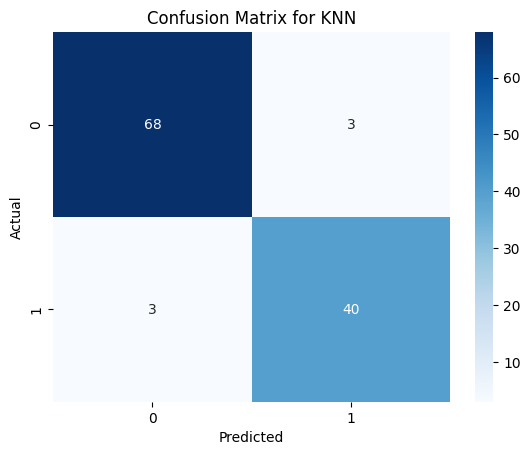

Logistic Regression Model Performance:
Accuracy: 0.9736842105263158
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



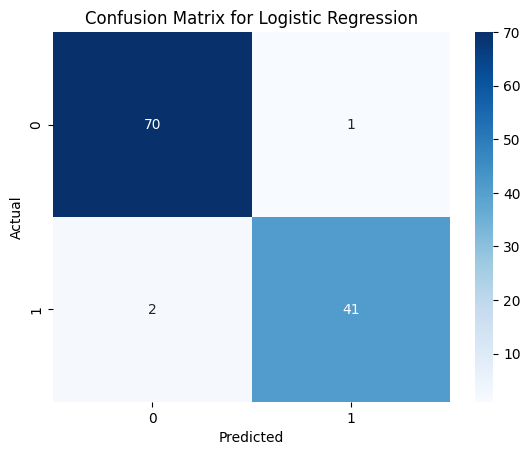

Model evaluation complete.


In [38]:
# Step 13: Import evaluation metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 14: Evaluate KNN model
y_pred_knn = knn.predict(X_test)
print("KNN Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

# Step 15: Confusion matrix for KNN
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Step 16: Evaluate Logistic Regression model
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))

# Step 17: Confusion matrix for Logistic Regression
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("Model evaluation complete.")

Logistic Regression is better than KNN for this task. It has an accuracy of 97.4%, while KNN is at 94.7%.

Logistic Regression is also more accurate in predicting malignant tumors, with 98% precision compared to KNN’s 93%. Overall, Logistic Regression is the better choice.

4. Report and Visualizations

Comparison of KNN and Logistic Regression Models:
KNN Accuracy: 0.9473684210526315
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Logistic Regression Accuracy: 0.9736842105263158
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



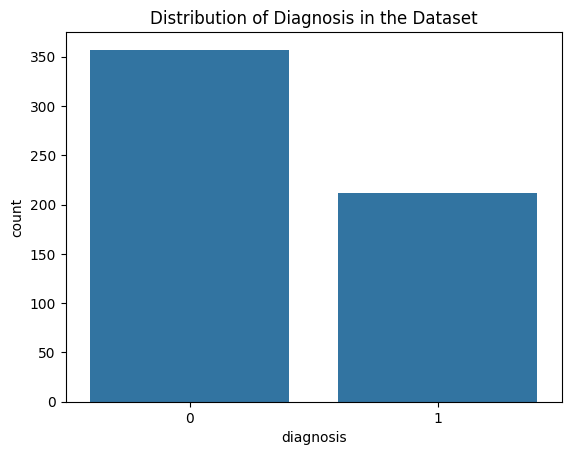

Report and visualizations complete.


In [39]:
# Step 18: Compare models and report findings
print("Comparison of KNN and Logistic Regression Models:")

# KNN Results
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {knn_accuracy}")
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))

# Logistic Regression Results
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression Accuracy: {log_reg_accuracy}")
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_log_reg))

# Step 19: Optional Visualizations (decision boundaries if applicable, or data distribution)
# Example: Distribution of diagnosis values in the dataset
sns.countplot(x='diagnosis', data=df)
plt.title('Distribution of Diagnosis in the Dataset')
plt.show()

print("Report and visualizations complete.")

## 1. Data Preprocessing
- Loaded Dataset: Analyzed the data structure and checked for missing values.
- Handled Missing Values: Used mean imputation to replace missing values.
- Converted Target: Changed diagnosis labels ('M' for malignant and 'B' for benign) to 1 and 0.
- Split Data: Divided the dataset into training (80%) and testing (20%) sets.
- Normalized Features: Scaled the features for better model performance.

## 2. Model Development
- KNN: Used K-Nearest Neighbors with 3 neighbors.
- Logistic Regression: Developed a Logistic Regression model for comparison.

## 3. Model Evaluation
## KNN Results:
- Accuracy: 94.7%
- Precision (Malignant): 93%
- Recall (Malignant): 93%

## Logistic Regression Results:
- Accuracy: 97.4%
- Precision (Malignant): 98%
- Recall (Malignant): 95%

## 4. Conclusion
Logistic Regression is better than KNN, achieving higher accuracy and better precision in predicting malignant tumors.